# Analysis of the Covid-19 Pandemic
## Brent Freedman, Saideep Kuchibhotla



# Introduction

The overall purpose of this project will be to evaluate and analize the covid-19 pandemic of 2020. Hopefully by exposing the true size and impact of the pandemic, people will take it seriously and contribute to proteciting the health of the general public.

In this tutorial, we will walk through the data science process starting with the data collection of data collection.

# Required tools

### Needed Libraries
1. pandas
2. numpy
3. seaborn
4. warnings
5. os
6. datetime
7. dateutil
8. sklearn
9. matplotlib
10. plotly


### Data Collection

The data collection stage is very important. Without proper data to work with, no analysis can be done. Make sure to find credible and recent data to create accurate models and analysis.

In this project the Covid-19 data we used comes from Johns Hopkins University and is available at this link:

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

The Brent Crude Oil data set is from the U.S Energy Information Administration(EIA) and is available at this link:
https://www.eia.gov/dnav/pet/hist/rbrteD.htm







# Importing Data
We will be importing the data and immediately converting it into a pandas dataframe to make it easy to manage. Both of our datasets are in the form of CSV files or comma separated variables. Luckily Pandas has a builtin function called read_csv() that converts the passed in csv file into a pandas dataframe. Below we convert both files into pandas dataframes and store them in separate variables.



In [14]:
# Data reading
import pandas as pd
import numpy as np
import seaborn
import warnings
import os
warnings.filterwarnings('ignore')
data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", sep=',')



oil_data = pd.read_csv('Daily_Brent_Crude_Oil_Spot_Prices.csv')

data.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,42463,42609,42795,42969,43035,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25294,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,63446,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5477,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12816,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626


#Data Tidying
 
In order to make the collected data more manageable for analysis purposes, it should be wrangled into a tidy format. Data is collected in all types of formats and styles, so having a universal format is helpful for making the collected data easily understandable and easy to work with. To achieve tidy data, each variable will form a column in the table and each observation will form a row in the table.
 
As of now, the Covid-19 dataset is not in tide form. The data table is in a long format where each day of data takes up a new column in the table. Instead we want each day, or each observation, to be a row in the table. To perform this transition we use pandas helpful function melt where we can condense all the day columns into a single Date column and put the values its used to store into another column we named Cases.
 
When a csv file is imported with dates, the dates are read as strings. Dates as strings are hard to work with as they are hard to compare and sort properly.
To fix this issue we use the to_datetime() pandas function to convert the date strings into easy to control datetime variables.
 
To continue our wrangling process, we wanted to convert another aspect of the data. As of now the Cases numbers are accumulated totals since the start of the pandemic, to gain a better understanding of the current state of the pandemic, we want to also know the number of new cases from each day of data. First, to make sure that the case numbers only allie to each individual country, we group up the data by country. Grouping of the data in this fashion will allow the next function we call on the data to run over each group individually instead of over the entire data set.


In [15]:
# Tidying the covid data
melted = pd.melt(data, ['Province/State','Country/Region', 'Lat', 'Long'], var_name="Date", value_name='Cases')

melted = melted.drop(columns=['Province/State'])
melted = melted.rename(columns={'Country/Region': 'Country'})
melted["Date"] = pd.to_datetime(melted['Date'])
melted = melted.groupby(['Country', 'Date']).sum()

Now, that the data is grouped properly, we can now create the daily cases row. To accomplish this for each day we obtain the case value of the pervious day and subtract it from the current day to get the one day change in covid cases. We use the method shift() that shifts the data values in a column down 1 slot and we store this in a new colum called Next_day. Now with this new column of data we can subtract the new column from the old column to get a new column that will store the differnce between the two columns which is the daily new cases.


In [16]:
melted["Next_day"] = melted['Cases'].shift(fill_value=0)
melted["Daily_change"]= melted['Cases'] - melted['Next_day']
melted = melted.drop(columns=['Next_day'])

#reset index to remove the grouping on the data.
melted = melted.reset_index()

#Here we ignore the starting dates as these will not have a change from a previous day
melted = melted[melted["Daily_change"] >= 0] 


Now lets tidy the Oil price data.
This data set is a bit easier to work with as it is already in long format with each day being a new row.

Firstly we conver the date from strings to datetime objects for easy comparisons and graphing.
Then, we store just the oil data from the duration of covid-19 into a variable. 

In [17]:
# Tidy the Oil data
oil_data
oil_data["Date"] = pd.to_datetime(oil_data['Date'])
oil_data = oil_data.rename(columns={"Brent": "Oil Prices"})

from datetime import datetime
from dateutil.parser import parse
time = '2020-01-23'
datetime.strptime(time, '%Y-%m-%d')
oil_data_2020= oil_data[oil_data["Date"] >= time]

oil_data_2020

,Date,Oil Prices
8296,2020-01-23,61.26
8297,2020-01-24,59.34
8298,2020-01-27,58.54
8299,2020-01-28,59.37
8300,2020-01-29,59.46
...,...,...
8514,2020-12-01,47.03
8515,2020-12-02,47.80
8516,2020-12-03,48.37
8517,2020-12-04,49.10


# Exploratory Data Analysis

Now lets conduct some Data Analysis on the newly formated data that we have. Lets first take a look at the average number of COVID cases over time.
Luckily we can accomplish this by using Pandas built in plot function which also utilizes Matplotlib functions as well. We can then expand the graph so that we can read it easier. 

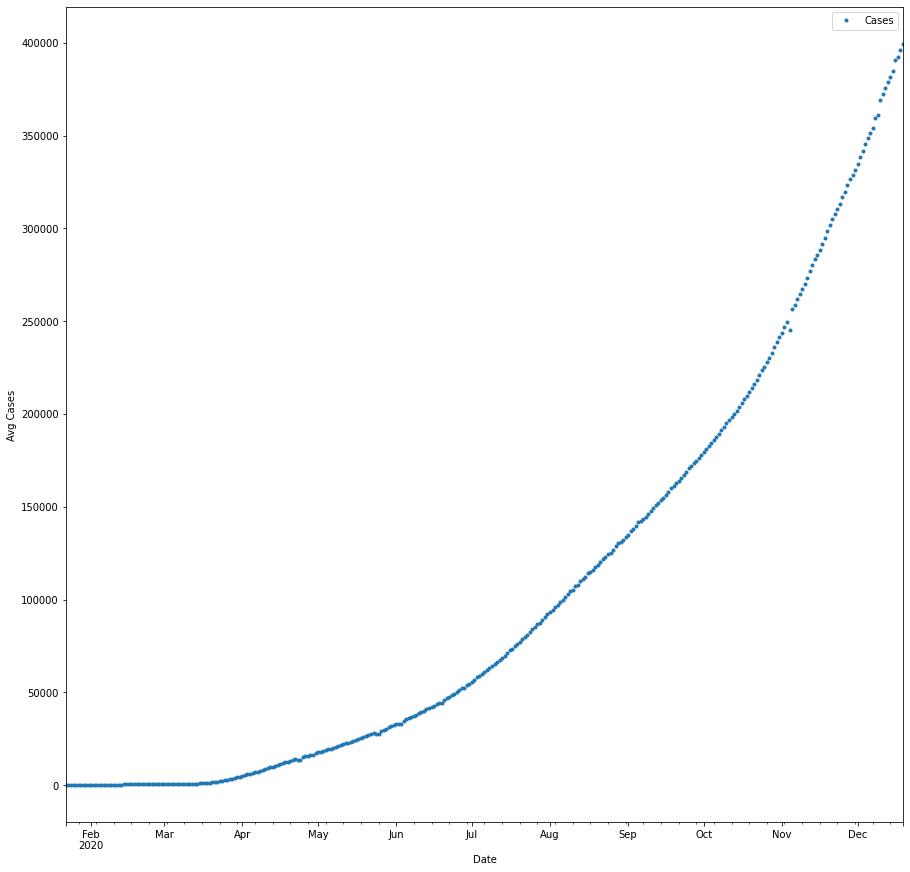

In [18]:
# Plots Average Cases per Day
pl = melted.groupby(by=['Date']).mean()
pl = pl.plot(y='Cases', figsize=(15,15), style='.').set_ylabel("Avg Cases")


It looks as if the average of COVID cases is not steadily rising but rising with a non linear degree. It appears that COVID is going to continue to rise at this rate if something is not done.

That brings us to some Machine learning. Let's actually try to predict how covid is going to increase over time with the data that we currently have. We can try a linear regression model and polynomial regresssion model to understand which model would suit us better. We can accomplish this buy using Sci-kit learn which is a machine learning class. We definitely recommend to learn more about it here: https://scikit-learn.org/stable/

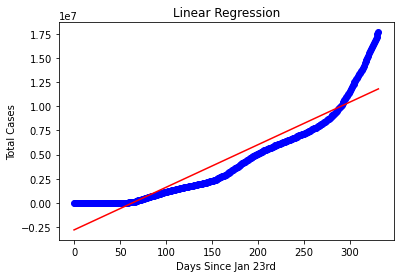

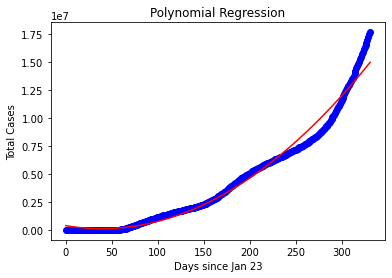

In [19]:
#Regression Training

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
# liner regression of the data for Cases v. Day for the US
usa_data = melted[melted['Country'] == 'US']
usa_data["Days"] = list(range(len(usa_data.index)))

X = [[v] for v in usa_data['Days'].values]
y = [[v] for v in usa_data['Cases'].values]

regr = LinearRegression()

regr.fit(X, y)

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
plt.plot(X, regr.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Days Since Jan 23rd') 
plt.ylabel('Total Cases') 


plt.show() 

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Days since Jan 23') 
plt.ylabel('Total Cases') 
  
plt.show() 


It seems like it our first regression model did not work the way we wanted it too. Given the data, a simple linear regresssion does not provide an accurate prediction of a polynomial graph since the graph is increasing at a higher degree. 

However, our second model seems to have worked perfectly. Using a polynomail regression provides a more accurate prediction of COVID-19 cases overtime since it follows the general curve of the graph.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdd2ca0908>]],
      dtype=object)

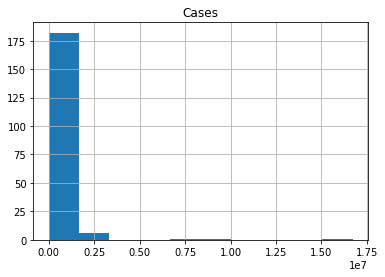

In [20]:
#shows us that most of the Covid cases are found in only a couple countries.
#Many countires actually have low numbers of Covid-19 cases.
time = '2020-12-15'
datetime.strptime(time, '%Y-%m-%d')
final_day = melted[melted["Date"]==time]
final_day.hist("Cases")

# Mapping the Covid-19 Data
One thing that is interesting to see with the covid data is how it spread to other countries over time. Luckily, Johns Hopkins keeps track of the longitude and latitude of where the covid cases were reported from. With the longitude and latitude, the data can be easily mapped.
 
In this project we created two different maps. The first map shows the total accumulated global Covid-19 cases over time. The second map shows the daily new global Covid-19 over time. Using plotly to create the maps, the maps are interactive allowing to scroll through time or zoom in on a specific area of land. I personally liked using plotly because it autoplays the data over time allowing for a visual of Covid-19 spreading over time.


In [ ]:
#Total Cases
import plotly.express as px
df = melted
df["Date"] = df["Date"].astype(str)
fig = px.scatter_geo(df, lat="Lat", lon="Long",
                     hover_name="Country", size="Cases",size_max=60,
                     animation_frame="Date",
                     projection="natural earth",
                     title = "Total Cases")
#Change time per frame of animation
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100
fig.show()

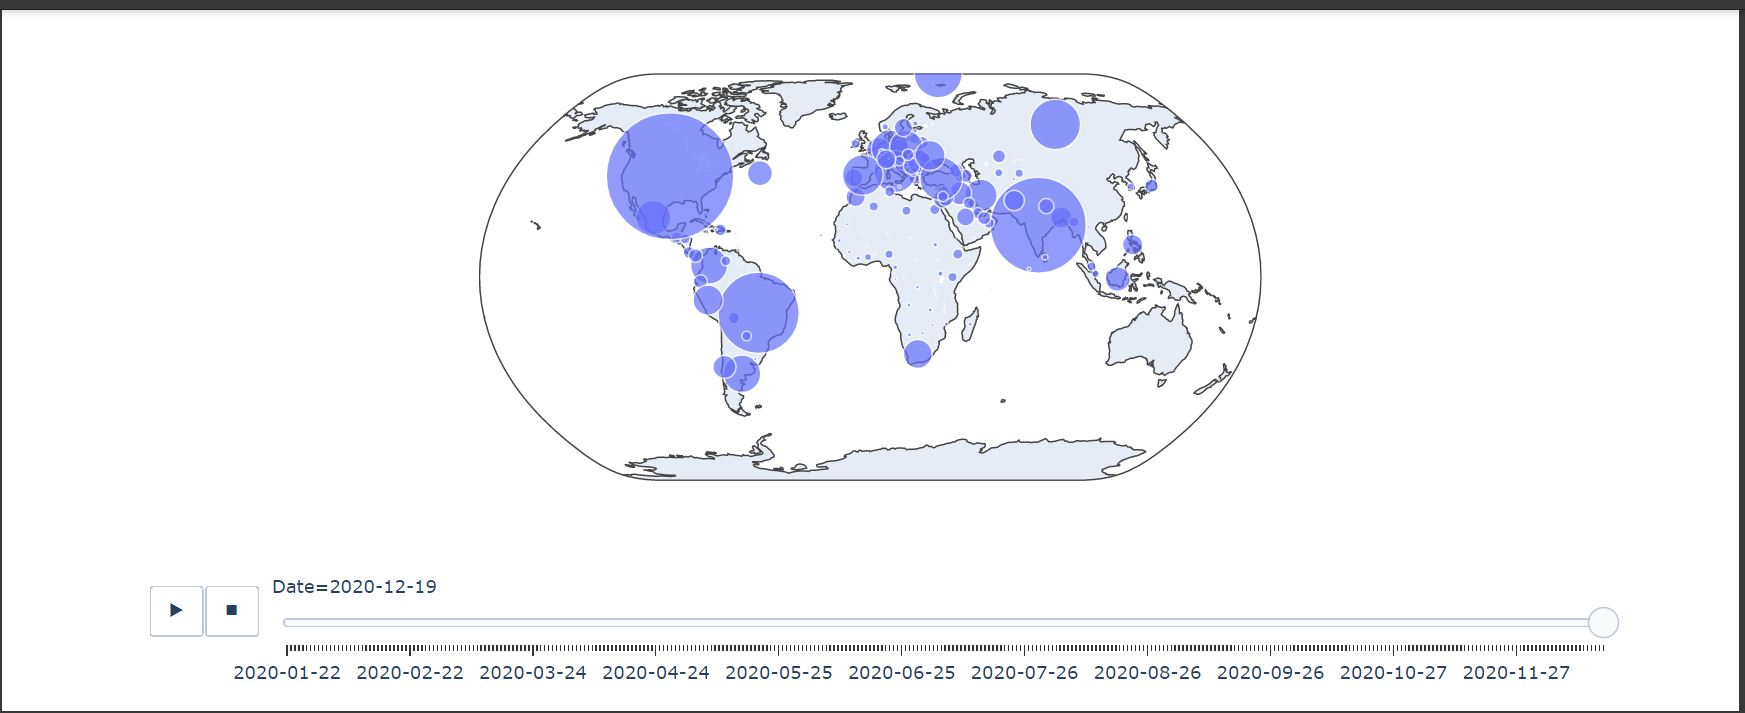

In [ ]:
#Daily cases
fig = px.scatter_geo(df, lat="Lat", lon="Long",
                     hover_name="Country", size="Daily_change",size_max=60,
                     animation_frame="Date",
                     projection="natural earth",
                     title = "Daily Cases")
#Change time per frame of animation
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100
fig.show()


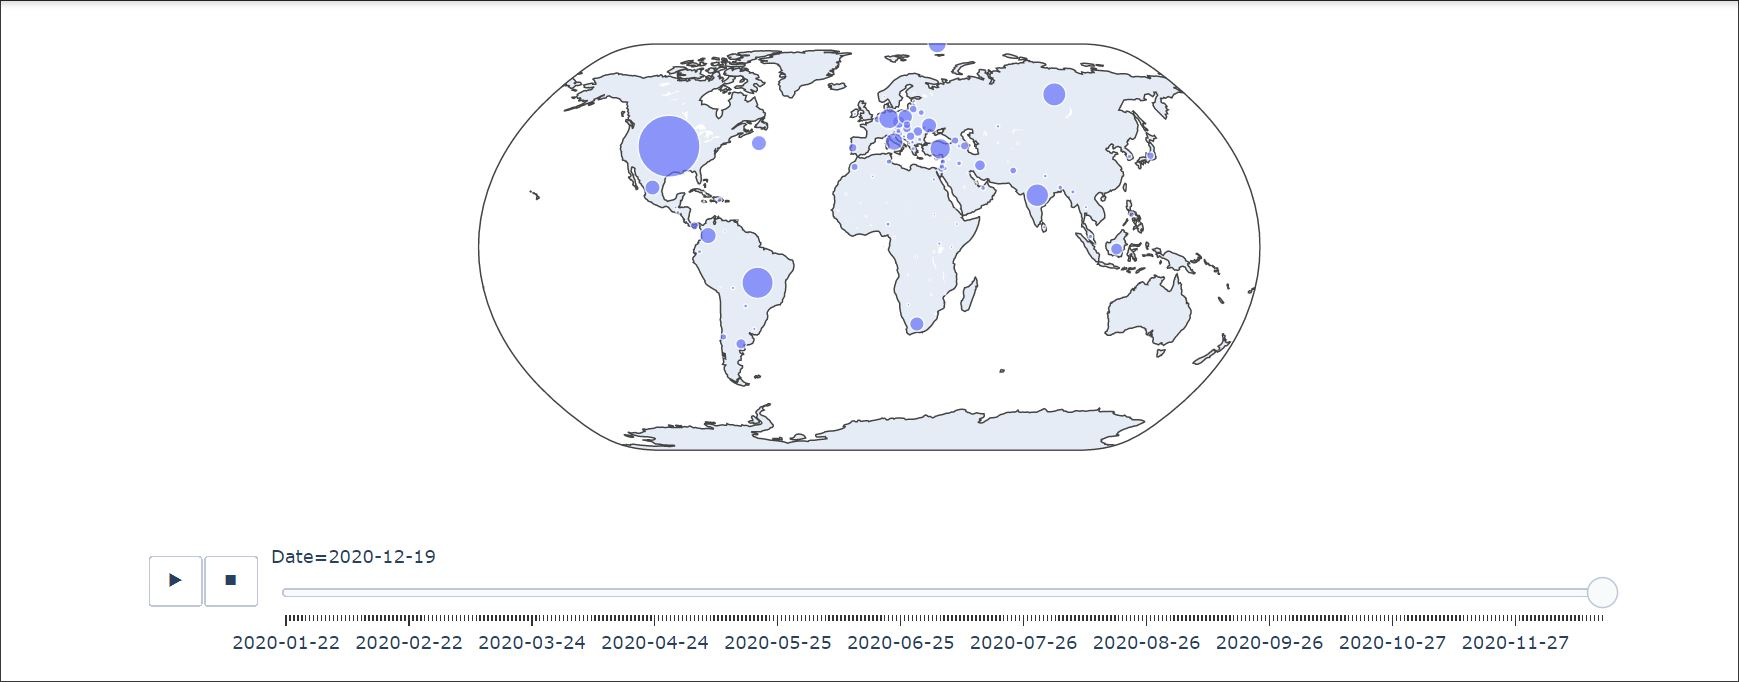

# Oil Machine Learning

Let's try to do the same regression testing that we used earlier on the COVID cases on the price of oil to see if we can predict the price of oil over time. We can try to compare the results of a linear regression versus a polynomial regression to see which model would work best for us.

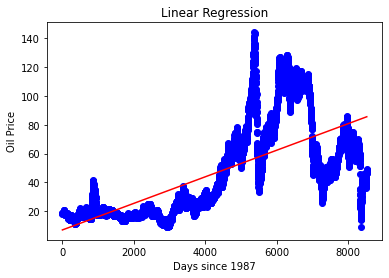

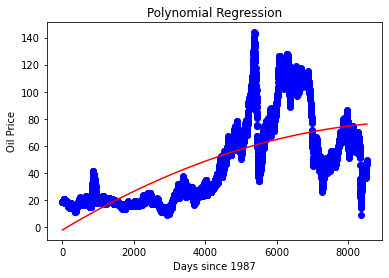

In [21]:
#Regression Training

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
# liner regression of the data for Oil Prices v. Day 

oil_data["Days"] = list(range(len(oil_data.index)))

X = [[v] for v in oil_data['Days'].values]
y = [[v] for v in oil_data['Oil Prices'].values]

regr = LinearRegression()

regr.fit(X, y)

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
plt.plot(X, regr.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Days since 1987') 
plt.ylabel('Oil Price') 


plt.show() 

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Days since 1987') 
plt.ylabel('Oil Price') 
  
plt.show() 

Polynomial and linear regression does not seem to be an effective model for this data. Depending on the consistency of the data, different types of models work best. Make sure to check out the link from the first testing to learn more about the different types of regression you can accomplish on the data that you use. 

Since the data from crude oil prices seems to fluctuate a lot, it is pretty difficult to make a good predicitive model on oil prices. Our linear model tells us that the price of oil will continue to go up, but our polynomial model tells us that the price of oil will even out at around 80 dollars. Neither model is a good predictor for this type of data. 

# Further Analysis

The Covid-19 pandemic has affected many aspects of life, from needing to socially distance, to closing of restuants and bussinesses, everyone has been impacted by the pandemic. For this project in particular we will be analizing Covid-19's impact on the price of crude oil which is refined for use in many types of fuels.

One easy way to begin analyzing how Covid-19 impacted crude oil is by joining the two data sets together. By joining the data sets into one table, functions will be directly applied to all the data. Additionally, by joining the data together by date, the Covid-19 data and crude oil data can be easily graphed together in a meaningful way.
 
To join the data we first need to group the covid data by data so that all the separate countries can be summed up into a single global case number that can be compared to the single crude oil number.



In [22]:
#Join data
global_covid = melted.groupby(['Date']).sum()
global_covid=global_covid.reset_index()

Now that the Covid-19 holds the global number of cases per day we can now group the two datasets together.
 
Pandas has the function merge() that allows joining two pandas dataframes together. Just input the two dataframes and specify how the data should be joined. In this case we join the data by an inner join meaning it will only keep the rows where both the covid data and the oil data had the same date.

In [23]:
covid_oil = pd.merge(global_covid, oil_data_2020, how='inner')
#remove because sum summed up lat and long
covid_oil = covid_oil.drop(columns=['Lat','Long'])
covid_oil

,Date,Cases,Daily_change,Oil Prices
0,2020-01-23,654,99,61.26
1,2020-01-24,941,287,59.34
2,2020-01-27,2927,809,58.54
3,2020-01-28,5578,2651,59.37
4,2020-01-29,6167,589,59.46
...,...,...,...,...
218,2020-12-01,63947958,608693,47.03
219,2020-12-02,64596103,648145,47.80
220,2020-12-03,65288306,692203,48.37
221,2020-12-04,65968507,680201,49.10


Now that the two data sets have been joined into a single dataset, we can make graph that visualizes their relationship.

This first graph simply shows oil prices over time during the covid pandemic.

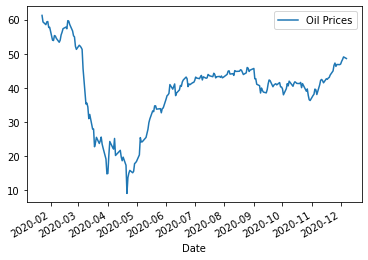

In [24]:
#Oil prices during the time of covid
covid_oil.plot(x="Date",y="Oil Prices")

This second graph shows the Global Covid-19 cases per-day.

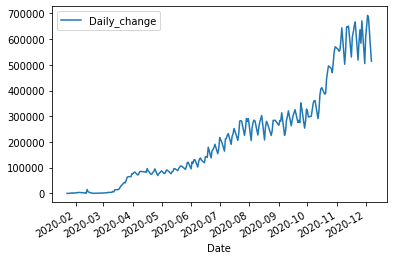

In [25]:
#Global cases per day is now at its worse
covid_oil.plot(x="Date", y="Daily_change")

Now, by placing the daily change in Covid-19 in the X axis and Oil prices on the Y axis, we can see how oil prices react to how severe Covid-19 is.
 
Interestingly, there is not a clear relationship. Even in the worst days of Covid-19 spread, oil prices did not directly react to Covid-19. This non linear relationship may be due to people becoming more accustomed to the virus over time and even though the virus is currently at its worst, fear has died down and life resumes.


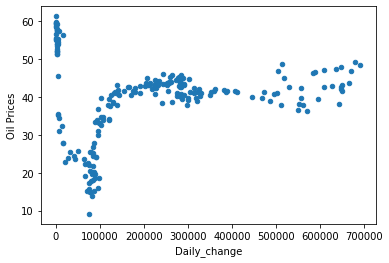

In [26]:
#Daily change in covid compared to oil prices
covid_oil.plot(x="Daily_change", y="Oil Prices", kind="scatter")

# Takeaways

What we can tell from the analysis that we have made on not only COVID from January to December but also the oil prices starting from 1987 is that the US is having the most difficult time handling COVID out of most other countries, but that was also on the News. Our actual testing and analysis proves that the US is really struggling in trying to handle COVID unlike most other countries. We also realize that only a hand few countries are the main contributors to the amount of global COVID cases. This could also be because many other countries, especially smaller countries, may not have the ability to test and track COVID cases that they are having. It could also be possible that there may not have any COVID cases at all! What we do understand is the data provided to us. If COVID continues down the path we have seen, many people will be impacted. We even see a dramatic shift in oil prices in 2020.
 
From our analysis of Global Crude Oil prices. It seems that there are a lot of factors that affect the price of oil. We were hoping to see that oil had consistent growth or decline and we were predicting that COVID had the most influential impact on the price of oil, but we were wrong. It seems like there are many factors that impact the price of oil. From what we can tell since the start of 2000, oil prices have continually dropped. The biggest drops seem to be major economic events like 9/11 as well as the 2009 recession in the US as those spikes happen around the same time as those events. We can also tell that COVID-19 did have some impact since oil is at the lowest it has been since 1987.
